In [1]:
import numpy as np
import copy 
import random

# The explaination for this part is very similar to part C

# Environemnts 

rewards = np.ones((36,4))*-1

    
    
for i in range(5):
    rewards[1+6*i,0] = -5
    rewards[4+6*i,1] = -5
    rewards[4+6*i,3] = -5

    
rewards[8,0] = -5
rewards[3,1] = -5
rewards[15,1] = -5
rewards[21,1] = -5
rewards[34,0] = -5
rewards[34,1] = -5
rewards[34,2] = -5
rewards[34,3] = -5
rewards[4,2] = -5
rewards[16,2] = -5
rewards[7,2] = -5
rewards[9,3] = -5
rewards[21,3] = -5
rewards[27,3] = -5


rewards[27,0] = 50
rewards[25,1] = 50
rewards[31,0] = 50
rewards[31,1] = 50
rewards[31,2] = 50
rewards[31,3] = 50

In [2]:
# Parameters
gamma = 1
alpha = 0.05
num_episode = 5000
min_difference = 1e-12
goal_state = 32
epsilon = 0.1

In [3]:
def next_State(state, action):
    if state<30:
        if action == 0:
            state_next = state + 5
        elif action == 1:
            state_next = state + 7
        elif action == 2:
            state_next = state + 6
        elif action == 3:
            state_next = state + 1
    else:
        state_next = state + 1
    return state_next

In [4]:
def Action_greedy(state):
    if np.random.uniform(0,1) < epsilon:
        # Choose a random action
        action = random.randint(0, 3)
    else:
        # Choose the action of a greedy policy
        action = np.argmax(rewards[state])
    return action

In [5]:
def Check_break(cur_state):
    Br = [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35]
    for i in Br:
        if(i == cur_state):
            return 1
    else:
        return 0

In [6]:
def QLearning(Start_Point, rewards, goal_state=None, gamma=0.99, alpha=0.01, num_episode=1000, min_difference=1e-5):

    Sum_reward = np.zeros(num_episode)
    Q = np.zeros(rewards.shape)
    all_states = np.arange(len(rewards)) 
    all_states = np.delete(all_states, [0, 5, 6, 10, 11, 12, 13, 17, 18, 22, 23, 24, 28,29,30,35], 0)
    for i in range(num_episode):
        Q_old = copy.deepcopy(Q)
        # initialize state
        initial_state = np.random.choice(all_states)
        #initial_state = Start_Point
        action = Action_greedy(initial_state)
        SS = next_State(initial_state, action)
        Q[initial_state][action] = Q[initial_state][action] + alpha * (rewards[initial_state][action] + gamma * np.max(Q[SS]) - Q[initial_state][action])
        cur_state = SS
        Sum_reward[i] = Sum_reward[i] + rewards[initial_state][action]

        # loop for each step of episode, until reaching goal state
        counter = 1
        while cur_state != goal_state:
            Check = Check_break(cur_state)
            if Check == 1:
                break
            # choose action form states using policy derived from Q
            action = Action_greedy(cur_state)
            #print("action: ", action)
            SS = next_State(cur_state, action)
            #print("SS: ", SS)
            Q[cur_state][action] = Q[cur_state][action] + alpha * (rewards[cur_state][action] + gamma * np.max(Q[SS]) - Q[cur_state][action])
            Sum_reward[i] = Sum_reward[i] + rewards[cur_state][action]
            counter = counter + 1
            cur_state = SS
        if cur_state != goal_state:
            Sum_reward[i] = -2
        else: 
            Sum_reward[i] = Sum_reward[i] / counter
            
    return Q, Sum_reward

In [7]:
Q, R = QLearning(1, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.4875    , 45.89554345, 17.63196678,  3.99954456],
       [44.89427798, 13.47071585, 13.69695832, 12.94163612],
       [45.89409572, -1.13109531, 14.35422354,  9.92308151],
       [44.89642691, -1.50831352, -1.13109531, -1.32454055],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-2.15599954, 45.87953345, -2.15599954, 17.13200623],
       [-2.79936666, 46.88021946, 26.5598706 , 26.06265222],
       [45.88862583, 14.55415808, 22.23673838, -2.90939832],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [46.84459445, 35.41568754, 38.64829039, 34.90941119],
       [47.83947776, -3.54005488, 31.48049911, 29.81722983],
       [46.89101841, -1.

In [8]:
def navigate(Start_point):
    Start_point = Start_point - 1
    i = 0
    Q_nav = np.array(Q)
    while True:
        i = i + 1
        if np.argmax(Q_nav[Start_point])== 0:
            print("Right-Up")
            Start_point = Start_point + 5
            
        elif np.argmax(Q_nav[Start_point]) == 1:
            print("Right-Down")
            Start_point = Start_point + 7
            
        elif np.argmax(Q_nav[Start_point]) == 2:
            print("Right")
            Start_point = Start_point + 6
        elif np.argmax(Q_nav[Start_point]) == 3:
            print("Down")
            Start_point = Start_point + 1
            
        if Start_point == 32:
            print("Goal !")
            break
        if i > 10:
            break

In [9]:
Start_Point = np.array(2)
navigate(Start_Point)

Right-Down
Right-Down
Right-Up
Right-Up
Right-Down
Goal !


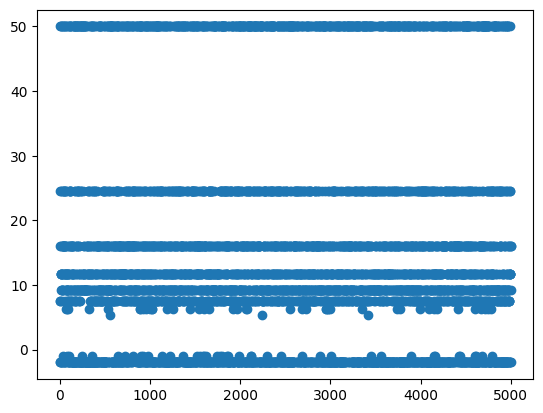

In [10]:
import matplotlib.pyplot as plt

X = np.arange(num_episode)+1

plt.scatter(X, R)
plt.show()

In [11]:
Q, R = QLearning(4, rewards, goal_state=goal_state, gamma=gamma, alpha=alpha, num_episode=num_episode, min_difference=min_difference)           
Q

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.713125  , 45.86228712, 15.92908339,  7.79707121],
       [44.86441218,  6.37107308,  9.22454696,  6.3171425 ],
       [45.86615146, -1.84875295,  6.34848725,  8.06739341],
       [44.8706739 , -1.32454055, -1.84875295, -0.92746875],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-3.01392841, 45.8536063 , -2.90939832, 18.58398641],
       [-2.79936666, 46.85326954, 33.13458379, 24.21215144],
       [45.85437468, 23.91637114, 20.22099785, -2.90939832],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [46.85309437, 35.96809991, 34.95043814, 39.9198175 ],
       [47.85310012, -3.38233228, 28.42096791, 26.87339789],
       [46.85943529, -0.

In [12]:
Start_Point = np.array(5)
navigate(Start_Point)

Right-Up
Right-Up
Right-Up
Right-Down
Right-Up
Right-Up


IndexError: index 36 is out of bounds for axis 0 with size 36

In [ ]:
plt.scatter(X, R)
plt.show()